<a href="https://colab.research.google.com/github/PRAN20/Plant-Disease-Detection/blob/main/Plant_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Plant Diseases Classification Using AlexNet**

# **Importing Header Files**

In [ ]:
import numpy as np
import pandas as ps
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
# from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

# **Importing Header Files**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 31.39 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [ ]:
cd PlantVillage-Dataset

/content/PlantVillage-Dataset


# **Creating AlexNet Model**

In [ ]:
classifier = Sequential()

# Convolution Step 1
classifier.add(Convolution2D(96, 11, strides = (4, 4), padding = 'valid', input_shape=(224, 224, 3), activation = 'relu'))

# Max Pooling Step 1
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Convolution Step 2
classifier.add(Convolution2D(256, 11, strides = (1, 1), padding='valid', activation = 'relu'))

# Max Pooling Step 2
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Convolution Step 3
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 4
classifier.add(Convolution2D(384, 3, strides = (1, 1), padding='valid', activation = 'relu'))
classifier.add(BatchNormalization())

# Convolution Step 5
classifier.add(Convolution2D(256, 3, strides=(1,1), padding='valid', activation = 'relu'))

# Max Pooling Step 3
classifier.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'valid'))
classifier.add(BatchNormalization())

# Flattening Step
classifier.add(Flatten())

# Full Connection Step
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 4096, activation = 'relu'))
classifier.add(Dropout(0.4))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 1000, activation = 'relu'))
classifier.add(Dropout(0.2))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 38, activation = 'softmax'))
print(classifier.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                      

# **Importing Header Files**

In [ ]:
!unzip "/content/drive/MyDrive/best_weights_9.zip" -d "Weights"

Archive:  /content/drive/MyDrive/best_weights_9.zip
  inflating: Weights/best_weights_9.hdf5  


In [ ]:
classifier.load_weights('/content/PlantVillage-Dataset/Weights/best_weights_9.hdf5')

# **Checking Layers**

In [ ]:
from keras import layers
for i, layer in enumerate(classifier.layers):
   print(i, layer.name)

0 conv2d_5
1 max_pooling2d_3
2 batch_normalization_8
3 conv2d_6
4 max_pooling2d_4
5 batch_normalization_9
6 conv2d_7
7 batch_normalization_10
8 conv2d_8
9 batch_normalization_11
10 conv2d_9
11 max_pooling2d_5
12 batch_normalization_12
13 flatten_1
14 dense_4
15 dropout_3
16 batch_normalization_13
17 dense_5
18 dropout_4
19 batch_normalization_14
20 dense_6
21 dropout_5
22 batch_normalization_15
23 dense_7


In [ ]:
print("Freezed layers:")
for i, layer in enumerate(classifier.layers[:20]):
    print(i, layer.name)
    layer.trainable = False

Freezed layers:
0 conv2d_5
1 max_pooling2d_3
2 batch_normalization_8
3 conv2d_6
4 max_pooling2d_4
5 batch_normalization_9
6 conv2d_7
7 batch_normalization_10
8 conv2d_8
9 batch_normalization_11
10 conv2d_9
11 max_pooling2d_5
12 batch_normalization_12
13 flatten_1
14 dense_4
15 dropout_3
16 batch_normalization_13
17 dense_5
18 dropout_4
19 batch_normalization_14


In [ ]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 17, 17, 256)       2973952   
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                      

In [ ]:
import tensorflow as tf

from keras import optimizers
classifier.compile(optimizer=tf.keras.optimizers.SGD(lr=0.001, momentum=0.9, decay=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# **Extracting Data From Folder**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
base_dir = "/content/PlantVillage-Dataset/data_distribution_for_SVM"

training_set = train_datagen.flow_from_directory(base_dir+'/train',
                                                 target_size=(224, 224),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(base_dir+'/test',
                                            target_size=(224, 224),
                                            batch_size=batch_size,
                                            class_mode='categorical')

Found 8751 images belonging to 38 classes.
Found 10547 images belonging to 38 classes.


In [ ]:
class_dict = training_set.class_indices
print(class_dict)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '36': 30, '37': 31, '4': 32, '5': 33, '6': 34, '7': 35, '8': 36, '9': 37}


In [ ]:
li = list(class_dict.keys())
print(li)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '4', '5', '6', '7', '8', '9']


In [ ]:
train_num = training_set.samples
valid_num = valid_set.samples

In [ ]:
!unzip "/content/drive/MyDrive/AlexNetModel.zip" -d "save-model"

Archive:  /content/drive/MyDrive/AlexNetModel.zip
  inflating: save-model/AlexNetModel.hdf5  


# **Training Model**

In [ ]:
from keras.callbacks import ModelCheckpoint
weightpath = "/content/PlantVillage-Dataset/Weights/best_weights_9.hdf5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callbacks_list = [checkpoint]

#fitting images to CNN
history = classifier.fit_generator(training_set,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=valid_set,
                         epochs=25,
                         validation_steps=valid_num//batch_size,
                         callbacks=callbacks_list)
#saving model
filepath = "/content/PlantVillage-Dataset/save-model/AlexNetModel.hdf5"
classifier.save(filepath)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


Epoch 1/25
68/68 [==============================] - ETA: 0s - loss: 1.5114 - accuracy: 0.6411
Epoch 00001: val_accuracy improved from -inf to 0.75457, saving model to /content/PlantVillage-Dataset/Weights/best_weights_9.hdf5
68/68 [==============================] - 142s 2s/step - loss: 1.5114 - accuracy: 0.6411 - val_loss: 1.1128 - val_accuracy: 0.7546
Epoch 2/25
68/68 [==============================] - ETA: 0s - loss: 0.9814 - accuracy: 0.7457
Epoch 00002: val_accuracy improved from 0.75457 to 0.83108, saving model to /content/PlantVillage-Dataset/Weights/best_weights_9.hdf5
68/68 [==============================] - 143s 2s/step - loss: 0.9814 - accuracy: 0.7457 - val_loss: 0.7861 - val_accuracy: 0.8311
Epoch 3/25
68/68 [==============================] - ETA: 0s - loss: 0.7546 - accuracy: 0.8039
Epoch 00003: val_accuracy improved from 0.83108 to 0.86004, saving model to /content/PlantVillage-Dataset/Weights/best_weights_9.hdf5
68/68 [==============================] - 148s 2s/step - los

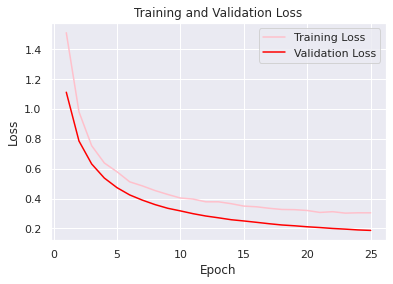

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


plt.figure()
loss = history.history['loss']
epochs = range(1, len(loss) + 1)
val_loss = history.history['val_loss']
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:


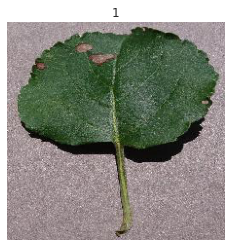

In [ ]:
from keras.preprocessing import image
import numpy as np
image_path = "/content/PlantVillage-Dataset/data_distribution_for_SVM/test/1/038dec47-6ec1-43e8-91d1-8b3d47c6f1e4.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)

d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]
     
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [ ]:
tf.keras.models.save_model(
    classifier, "/content/Model", overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None, save_traces=True
)

INFO:tensorflow:Assets written to: /content/Model/assets
